In [1]:
!pip install h5py
!pip install typing-extensions
!pip install wheel

In [2]:
!pip install pandas_ta
!pip install yfinance

     |████████████████████████████████| 115 kB 10.0 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=bd7816047e36a875add67f675aaa0cb63086f65387e2432334015bbb76a89cff
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta
     |████████████████████████████████| 6.4 MB 10.3 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but 

In [3]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import yfinance as yf

In [4]:
df = pd.DataFrame()
data = df.ta.ticker('tsla', period = '3mo', interval = '1h')

In [5]:
df = data.copy()

In [6]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2021-11-12 09:30:00-05:00,1047.500000,1054.500000,1027.930054,1046.795044,6696872,0,0
2021-11-12 10:30:00-05:00,1046.839966,1047.500000,1031.250000,1031.670654,3063932,0,0
2021-11-12 11:30:00-05:00,1031.619995,1032.199951,1019.200012,1027.130005,3734140,0,0
2021-11-12 12:30:00-05:00,1027.284180,1036.250000,1021.109985,1025.569946,3202101,0,0
2021-11-12 13:30:00-05:00,1025.579956,1036.999878,1021.349976,1025.135010,2664521,0,0


In [7]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2021-11-12 09:30:00-05:00,1047.500000,1054.500000,1027.930054,1046.795044,6696872,0,0
2021-11-12 10:30:00-05:00,1046.839966,1047.500000,1031.250000,1031.670654,3063932,0,0
2021-11-12 11:30:00-05:00,1031.619995,1032.199951,1019.200012,1027.130005,3734140,0,0
2021-11-12 12:30:00-05:00,1027.284180,1036.250000,1021.109985,1025.569946,3202101,0,0
2021-11-12 13:30:00-05:00,1025.579956,1036.999878,1021.349976,1025.135010,2664521,0,0
...,...,...,...,...,...,...,...
2022-02-11 11:30:00-05:00,886.000000,892.469971,882.099976,890.103577,2361793,0,0
2022-02-11 12:30:00-05:00,890.529907,892.114014,881.010010,881.200012,1615135,0,0
2022-02-11 13:30:00-05:00,881.340027,881.574585,862.299988,863.000000,4580097,0,0
2022-02-11 14:30:00-05:00,863.219971,866.039978,852.010010,857.729980,4184881,0,0


In [8]:
df.ta.macd().tail()

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
2022-02-11 11:30:00-05:00,-6.450157,-5.224340,-1.225817
2022-02-11 12:30:00-05:00,-8.106668,-5.504681,-2.601987
2022-02-11 13:30:00-05:00,-10.763974,-6.529589,-4.234385
2022-02-11 14:30:00-05:00,-13.143642,-7.127406,-6.016236
2022-02-11 15:30:00-05:00,-14.730632,-6.971516,-7.759115


In [9]:
ema12 = df.Close.ewm(span=12, adjust=False).mean()
ema26 = df.Close.ewm(span=26, adjust=False).mean()
macd = ema12 - ema26
macd.tail()

2022-02-11 11:30:00-05:00    -6.450157
2022-02-11 12:30:00-05:00    -8.106668
2022-02-11 13:30:00-05:00   -10.763974
2022-02-11 14:30:00-05:00   -13.143642
2022-02-11 15:30:00-05:00   -14.730632
Name: Close, dtype: float64

In [10]:
df.ta.macd(fast=10, slow=20, signal=5, append=True).tail()

,MACD_10_20_5,MACDh_10_20_5,MACDs_10_20_5
2022-02-11 11:30:00-05:00,-7.337306,-2.947758,-4.389549
2022-02-11 12:30:00-05:00,-8.752713,-2.908776,-5.843937
2022-02-11 13:30:00-05:00,-11.224678,-3.587161,-7.637517
2022-02-11 14:30:00-05:00,-13.316486,-3.785979,-9.530507
2022-02-11 15:30:00-05:00,-14.495847,-3.310227,-11.185620


In [11]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD_10_20_5,MACDh_10_20_5,MACDs_10_20_5
2021-11-12 09:30:00-05:00,1047.500000,1054.500000,1027.930054,1046.795044,6696872,0,0,NaN,NaN,NaN
2021-11-12 10:30:00-05:00,1046.839966,1047.500000,1031.250000,1031.670654,3063932,0,0,NaN,NaN,NaN
2021-11-12 11:30:00-05:00,1031.619995,1032.199951,1019.200012,1027.130005,3734140,0,0,NaN,NaN,NaN
2021-11-12 12:30:00-05:00,1027.284180,1036.250000,1021.109985,1025.569946,3202101,0,0,NaN,NaN,NaN
2021-11-12 13:30:00-05:00,1025.579956,1036.999878,1021.349976,1025.135010,2664521,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-02-11 11:30:00-05:00,886.000000,892.469971,882.099976,890.103577,2361793,0,0,-7.337306,-2.947758,-4.389549
2022-02-11 12:30:00-05:00,890.529907,892.114014,881.010010,881.200012,1615135,0,0,-8.752713,-2.908776,-5.843937
2022-02-11 13:30:00-05:00,881.340027,881.574585,862.299988,863.000000,4580097,0,0,-11.224678,-3.587161,-7.637517
2022-02-11 14:30:00-05:00,863.219971,866.039978,852.010010,857.729980,4184881,0,0,-13.316486,-3.785979,-9.530507


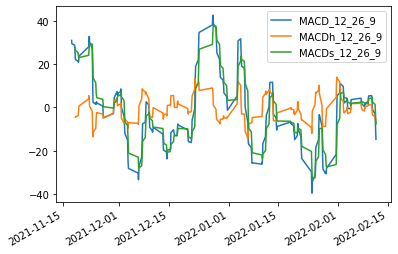

In [12]:
df.ta.macd().plot()

In [13]:
df.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

In [14]:
df.ta.rsi(length=14, append=True)

2021-11-12 09:30:00-05:00          NaN
2021-11-12 10:30:00-05:00          NaN
2021-11-12 11:30:00-05:00          NaN
2021-11-12 12:30:00-05:00          NaN
2021-11-12 13:30:00-05:00          NaN
                               ...    
2022-02-11 11:30:00-05:00    32.959599
2022-02-11 12:30:00-05:00    29.320491
2022-02-11 13:30:00-05:00    23.587436
2022-02-11 14:30:00-05:00    22.231883
2022-02-11 15:30:00-05:00    23.666232
Name: RSI_14, Length: 438, dtype: float64

In [15]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD_10_20_5,MACDh_10_20_5,MACDs_10_20_5,RSI_14
2021-11-12 09:30:00-05:00,1047.500000,1054.500000,1027.930054,1046.795044,6696872,0,0,NaN,NaN,NaN,NaN
2021-11-12 10:30:00-05:00,1046.839966,1047.500000,1031.250000,1031.670654,3063932,0,0,NaN,NaN,NaN,NaN
2021-11-12 11:30:00-05:00,1031.619995,1032.199951,1019.200012,1027.130005,3734140,0,0,NaN,NaN,NaN,NaN
2021-11-12 12:30:00-05:00,1027.284180,1036.250000,1021.109985,1025.569946,3202101,0,0,NaN,NaN,NaN,NaN
2021-11-12 13:30:00-05:00,1025.579956,1036.999878,1021.349976,1025.135010,2664521,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-02-11 11:30:00-05:00,886.000000,892.469971,882.099976,890.103577,2361793,0,0,-7.337306,-2.947758,-4.389549,32.959599
2022-02-11 12:30:00-05:00,890.529907,892.114014,881.010010,881.200012,1615135,0,0,-8.752713,-2.908776,-5.843937,29.320491
2022-02-11 13:30:00-05:00,881.340027,881.574585,862.299988,863.000000,4580097,0,0,-11.224678,-3.587161,-7.637517,23.587436
2022-02-11 14:30:00-05:00,863.219971,866.039978,852.010010,857.729980,4184881,0,0,-13.316486,-3.785979,-9.530507,22.231883


In [16]:
df = data.copy()

In [17]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2021-11-12 09:30:00-05:00,1047.500000,1054.500000,1027.930054,1046.795044,6696872,0,0
2021-11-12 10:30:00-05:00,1046.839966,1047.500000,1031.250000,1031.670654,3063932,0,0
2021-11-12 11:30:00-05:00,1031.619995,1032.199951,1019.200012,1027.130005,3734140,0,0
2021-11-12 12:30:00-05:00,1027.284180,1036.250000,1021.109985,1025.569946,3202101,0,0
2021-11-12 13:30:00-05:00,1025.579956,1036.999878,1021.349976,1025.135010,2664521,0,0
...,...,...,...,...,...,...,...
2022-02-11 11:30:00-05:00,886.000000,892.469971,882.099976,890.103577,2361793,0,0
2022-02-11 12:30:00-05:00,890.529907,892.114014,881.010010,881.200012,1615135,0,0
2022-02-11 13:30:00-05:00,881.340027,881.574585,862.299988,863.000000,4580097,0,0
2022-02-11 14:30:00-05:00,863.219971,866.039978,852.010010,857.729980,4184881,0,0


In [18]:
df_macd = df.ta.macd(12,21,9)

In [19]:
df_macd.tail()

,MACD_12_21_9,MACDh_12_21_9,MACDs_12_21_9
2022-02-11 11:30:00-05:00,-5.330287,-3.968710,-1.361577
2022-02-11 12:30:00-05:00,-6.529595,-4.134415,-2.395181
2022-02-11 13:30:00-05:00,-8.506273,-4.888873,-3.617399
2022-02-11 14:30:00-05:00,-10.239504,-5.297684,-4.941820
2022-02-11 15:30:00-05:00,-11.328848,-5.109622,-6.219226


In [20]:
df = data.copy()

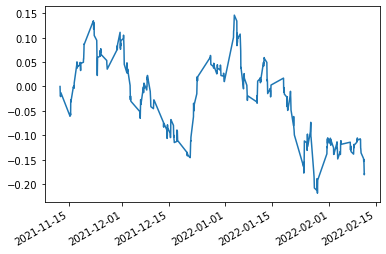

In [21]:
df.ta.percent_return(cumulative=True).plot()

In [22]:
df['rsi'] = df.ta.rsi(length=14)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,rsi
2021-11-12 09:30:00-05:00,1047.500000,1054.500000,1027.930054,1046.795044,6696872,0,0,NaN
2021-11-12 10:30:00-05:00,1046.839966,1047.500000,1031.250000,1031.670654,3063932,0,0,NaN
2021-11-12 11:30:00-05:00,1031.619995,1032.199951,1019.200012,1027.130005,3734140,0,0,NaN
2021-11-12 12:30:00-05:00,1027.284180,1036.250000,1021.109985,1025.569946,3202101,0,0,NaN
2021-11-12 13:30:00-05:00,1025.579956,1036.999878,1021.349976,1025.135010,2664521,0,0,NaN
...,...,...,...,...,...,...,...,...
2022-02-11 11:30:00-05:00,886.000000,892.469971,882.099976,890.103577,2361793,0,0,32.959599
2022-02-11 12:30:00-05:00,890.529907,892.114014,881.010010,881.200012,1615135,0,0,29.320491
2022-02-11 13:30:00-05:00,881.340027,881.574585,862.299988,863.000000,4580097,0,0,23.587436
2022-02-11 14:30:00-05:00,863.219971,866.039978,852.010010,857.729980,4184881,0,0,22.231883


In [23]:
df = data.copy()

In [24]:
df.ta.strategy(ta.CommonStrategy)

In [25]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_10,SMA_20,SMA_50,SMA_200,VOL_SMA_20
2021-11-12 09:30:00-05:00,1047.500000,1054.500000,1027.930054,1046.795044,6696872,0,0,NaN,NaN,NaN,NaN,NaN
2021-11-12 10:30:00-05:00,1046.839966,1047.500000,1031.250000,1031.670654,3063932,0,0,NaN,NaN,NaN,NaN,NaN
2021-11-12 11:30:00-05:00,1031.619995,1032.199951,1019.200012,1027.130005,3734140,0,0,NaN,NaN,NaN,NaN,NaN
2021-11-12 12:30:00-05:00,1027.284180,1036.250000,1021.109985,1025.569946,3202101,0,0,NaN,NaN,NaN,NaN,NaN
2021-11-12 13:30:00-05:00,1025.579956,1036.999878,1021.349976,1025.135010,2664521,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-11 11:30:00-05:00,886.000000,892.469971,882.099976,890.103577,2361793,0,0,910.961505,919.712247,915.874686,984.440296,2754742.30
2022-02-11 12:30:00-05:00,890.529907,892.114014,881.010010,881.200012,1615135,0,0,905.618005,917.977246,915.451687,983.560096,2750723.35
2022-02-11 13:30:00-05:00,881.340027,881.574585,862.299988,863.000000,4580097,0,0,898.657507,915.057745,914.583687,982.115071,2889076.15
2022-02-11 14:30:00-05:00,863.219971,866.039978,852.010010,857.729980,4184881,0,0,891.119226,911.860745,913.682487,980.574541,3020209.00


In [26]:
df = data.copy()

In [27]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2021-11-12 09:30:00-05:00,1047.500000,1054.500000,1027.930054,1046.795044,6696872,0,0
2021-11-12 10:30:00-05:00,1046.839966,1047.500000,1031.250000,1031.670654,3063932,0,0
2021-11-12 11:30:00-05:00,1031.619995,1032.199951,1019.200012,1027.130005,3734140,0,0
2021-11-12 12:30:00-05:00,1027.284180,1036.250000,1021.109985,1025.569946,3202101,0,0
2021-11-12 13:30:00-05:00,1025.579956,1036.999878,1021.349976,1025.135010,2664521,0,0
...,...,...,...,...,...,...,...
2022-02-11 11:30:00-05:00,886.000000,892.469971,882.099976,890.103577,2361793,0,0
2022-02-11 12:30:00-05:00,890.529907,892.114014,881.010010,881.200012,1615135,0,0
2022-02-11 13:30:00-05:00,881.340027,881.574585,862.299988,863.000000,4580097,0,0
2022-02-11 14:30:00-05:00,863.219971,866.039978,852.010010,857.729980,4184881,0,0


In [28]:
custom_test = ta.Strategy(
    name = 'test_strategy',
    description = 'details',
    ta = [
          {'kind': 'rsi', 'length': 17},
          {'kind': 'macd', 'fast': 16, 'slow': 21}
    ]
)

In [29]:
df.ta.strategy(custom_test)

In [30]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,RSI_17,MACD_16_21_9,MACDh_16_21_9,MACDs_16_21_9
2022-02-11 11:30:00-05:00,886.000000,892.469971,882.099976,890.103577,2361793,0,0,36.346217,-2.181078,-1.836579,-0.344499
2022-02-11 12:30:00-05:00,890.529907,892.114014,881.010010,881.200012,1615135,0,0,33.128242,-2.782375,-1.950301,-0.832074
2022-02-11 13:30:00-05:00,881.340027,881.574585,862.299988,863.000000,4580097,0,0,27.785353,-3.721573,-2.311599,-1.409974
2022-02-11 14:30:00-05:00,863.219971,866.039978,852.010010,857.729980,4184881,0,0,26.471848,-4.576047,-2.532858,-2.043188
2022-02-11 15:30:00-05:00,857.239990,866.000000,850.700012,859.330017,2844396,0,0,27.576291,-5.169730,-2.501233,-2.668497


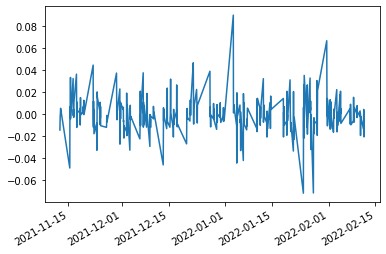

In [32]:
df.ta.percent_return(cummulative=True).plot()